In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("white")
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, roc_curve, confusion_matrix

In [3]:
#Mount Google Drive
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [5]:
data = pd.read_csv("/drive/MyDrive/ECG/time_series_data_v2.csv")
data_fft = pd.read_csv("/drive/MyDrive/ECG/time_series_data_v2_fft.csv")

In [6]:
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,7331,7332,7333,7334,7335,7336,7337,7338,7339,7340
0,0,-5.412070,-4.912070,-4.912070,-4.412070,-3.912070,-3.912070,-3.412070,-2.912070,-2.412070,...,3.843349,4.843349,5.843349,6.343349,7.343349,7.843349,7.343349,7.343349,7.343349,0.0
1,1,-0.427619,-0.927619,-1.927619,-1.427619,-0.927619,-0.927619,-0.927619,-0.927619,-1.927619,...,4.419414,2.919414,1.919414,0.419414,-0.580586,-0.580586,-0.580586,-1.580586,-1.580586,0.0
2,2,-1.890976,-1.890976,-1.890976,-1.890976,-1.890976,-1.390976,-1.390976,-1.390976,-1.890976,...,-5.128805,-6.128805,-6.878805,-6.378805,-6.128805,-6.128805,-6.128805,-5.628805,-5.128805,0.0
3,3,-6.685704,-8.685704,-8.685704,-9.185704,-9.685704,-9.685704,-9.519038,-9.685704,-9.185704,...,-0.994153,-0.994153,-0.994153,0.005847,1.005847,2.339181,3.505847,4.505847,5.005847,0.0
4,4,-2.185322,-2.185322,-2.185322,-2.185322,-2.185322,-2.185322,-2.185322,-2.185322,-2.185322,...,11.571700,7.264008,3.071700,0.571700,0.321700,0.071700,0.071700,-0.428300,-0.428300,0.0


In [7]:
data_fft.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,7331,7332,7333,7334,7335,7336,7337,7338,7339,7340
0,0,4.490630e-12,359.395768,240.342434,1258.060134,13.122370,61.994324,766.815409,72.645237,186.690957,...,187.401586,388.370320,687.743072,283.196842,849.694497,663.830240,484.992300,85.545474,299.688356,0.0
1,1,5.329071e-12,479.417114,257.187165,251.930201,429.970026,140.706199,77.617094,485.338913,330.590845,...,398.369226,951.579475,329.318267,883.013494,3263.566460,400.117978,3368.227865,2435.154186,492.071458,0.0
2,2,1.293188e-12,68.573003,210.118415,116.525644,48.964283,40.511865,320.467451,99.546274,64.076258,...,296.921270,315.521732,426.457402,455.735550,39.154757,708.575171,320.886489,166.594401,275.528160,0.0
3,3,1.108447e-12,349.856849,885.813195,375.552156,502.618042,417.290936,716.789186,147.643562,333.990301,...,1572.380407,1789.084686,899.106305,1040.144786,1442.152588,1596.893890,1751.284122,409.093644,341.973455,0.0
4,4,3.936407e-12,418.503978,651.546860,604.039039,220.816691,161.243231,269.548376,203.215322,231.956815,...,1195.016656,650.147669,795.512546,783.281097,2432.411685,1609.324637,515.542437,815.970564,256.701788,0.0


In [8]:
X = data.iloc[:,1:-1].to_numpy()
y = data.iloc[:,-1].to_numpy()
y[y !=0] = 1
X_fft = data_fft.iloc[:,1:-1].to_numpy()
y_fft = data_fft.iloc[:,-1].to_numpy()
y_fft[y_fft !=0] = 1

X = X[:,-1940:]
X_fft = X_fft[:,-1940:]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=111,
                                                    stratify=y)

X_fft_train, X_fft_test, y_fft_train, y_fft_test = train_test_split(X_fft, y_fft,
                                                    test_size=0.3,
                                                    random_state=111,
                                                    stratify=y_fft)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

0.5949820788530465
0.8648648648648649
0.4948453608247423


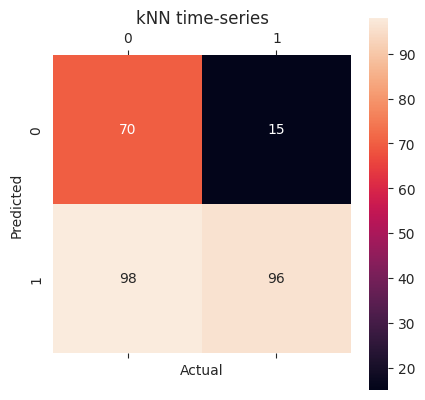

In [10]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print( accuracy_score(y_test,y_pred))
print( precision_score(y_test,y_pred))
print( recall_score(y_test,y_pred))


confmat = confusion_matrix(y_test,y_pred)
plt.matshow(confmat)
sn.heatmap(confmat,annot=True, annot_kws={"size":10}, fmt='d')
plt.title("kNN time-series")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.savefig("Long_lead_kNN time-series")

0.7419354838709677
0.8505747126436781
0.7628865979381443


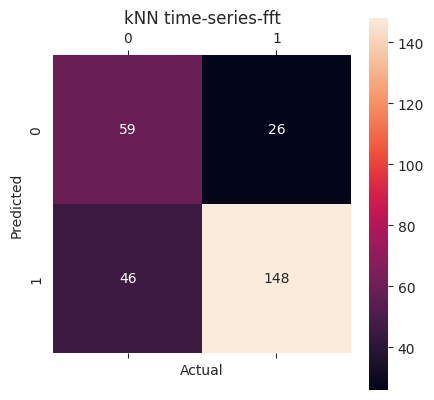

In [11]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_fft_train,y_fft_train)
y_fft_pred = knn.predict(X_fft_test)
print( accuracy_score(y_fft_test,y_fft_pred))
print( precision_score(y_fft_test,y_fft_pred))
print( recall_score(y_fft_test,y_fft_pred))

confmat = confusion_matrix(y_fft_test,y_fft_pred)
plt.matshow(confmat)
sn.heatmap(confmat,annot=True, annot_kws={"size":10}, fmt='d')
plt.title("kNN time-series-fft")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.savefig("Long_lead_kNN time-series-fft")

0.9139784946236559
0.9207920792079208
0.9587628865979382


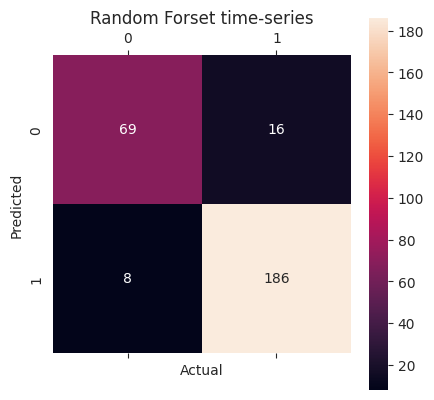

In [12]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()#n_estimators=1000,max_samples=800,max_depth = 100, random_state=614)

forest_clf.fit(X_train,y_train)
y_pred = forest_clf.predict(X_test)
print( accuracy_score(y_test,y_pred))
print( precision_score(y_test,y_pred))
print( recall_score(y_test,y_pred))

confmat = confusion_matrix(y_test,y_pred)
plt.matshow(confmat)
sn.heatmap(confmat,annot=True, annot_kws={"size":10}, fmt='d')
plt.title("Random Forset time-series")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.savefig("Long_lead_Random Forset time-series")

0.9175627240143369
0.9211822660098522
0.9639175257731959


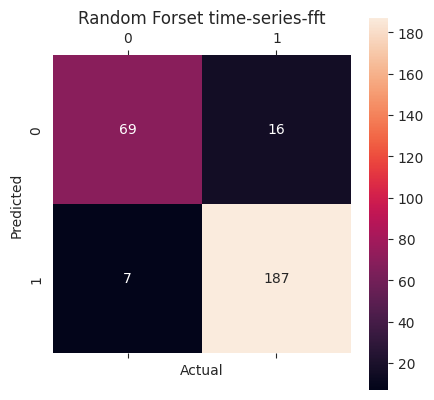

In [13]:
forest_clf = RandomForestClassifier()#n_estimators=1000,max_samples=800,max_depth = 100, random_state=614)

forest_clf.fit(X_fft_train,y_fft_train)

y_fft_pred = forest_clf.predict(X_fft_test)
print( accuracy_score(y_fft_test,y_fft_pred))
print( precision_score(y_fft_test,y_fft_pred))
print( recall_score(y_fft_test,y_fft_pred))

confmat = confusion_matrix(y_fft_test,y_fft_pred)
plt.matshow(confmat)
sn.heatmap(confmat,annot=True, annot_kws={"size":10}, fmt='d')
plt.title("Random Forset time-series-fft")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.savefig("Long_lead_Random Forset time-series-fft")

In [14]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils import to_categorical

In [15]:
model = models.Sequential()

In [16]:
model.add(layers.Dense(16, activation='relu', input_shape=(1940,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                31056     
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 2)                 34        
                                                                 
Total params: 33218 (129.76 KB)
Trainable params: 33218 (129.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# we compile the network like so
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [18]:
## I now fit the model, and store the training history
## I use 100 epochs and a batch_size of 512
history = model.fit(X_train,
                        to_categorical(y_train),
                        epochs = 100,
                        batch_size = 400,
                        validation_data=(X_test,to_categorical(y_test)))

Epoch 1/100
2/2 [==============================] - 3s 497ms/step - loss: 1.9329 - accuracy: 0.6949 - val_loss: 1.3664 - val_accuracy: 0.7061
Epoch 2/100
2/2 [==============================] - 0s 79ms/step - loss: 0.9077 - accuracy: 0.7211 - val_loss: 0.8470 - val_accuracy: 0.7204
Epoch 3/100
2/2 [==============================] - 0s 146ms/step - loss: 0.4693 - accuracy: 0.7797 - val_loss: 0.6577 - val_accuracy: 0.7527
Epoch 4/100
2/2 [==============================] - 0s 126ms/step - loss: 0.3111 - accuracy: 0.8582 - val_loss: 0.6476 - val_accuracy: 0.7634
Epoch 5/100
2/2 [==============================] - 0s 167ms/step - loss: 0.2621 - accuracy: 0.8875 - val_loss: 0.6606 - val_accuracy: 0.7599
Epoch 6/100
2/2 [==============================] - 0s 120ms/step - loss: 0.2181 - accuracy: 0.9137 - val_loss: 0.6731 - val_accuracy: 0.7921
Epoch 7/100
2/2 [==============================] - 0s 102ms/step - loss: 0.1858 - accuracy: 0.9522 - val_loss: 0.6737 - val_accuracy: 0.7993
Epoch 8/100
2/

In [19]:
history_dict = history.history

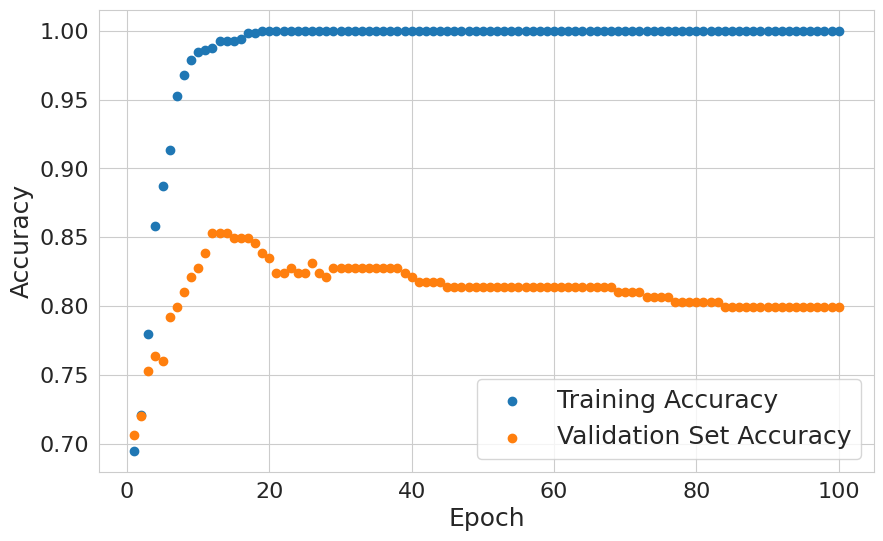

In [20]:
set_style("whitegrid")

plt.figure(figsize = (10,6))

plt.scatter(range(1,101), history_dict['accuracy'], label = "Training Accuracy")
plt.scatter(range(1,101), history_dict['val_accuracy'], label = "Validation Set Accuracy")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

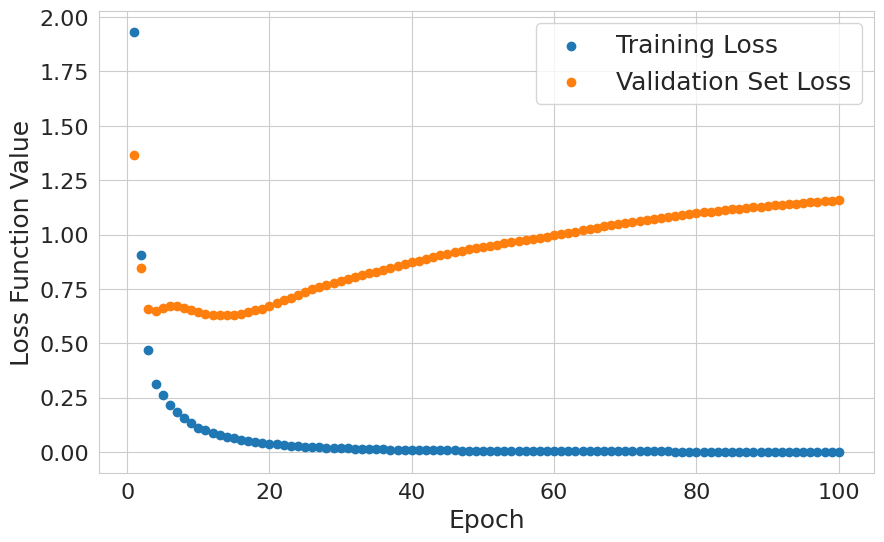

In [21]:
plt.figure(figsize = (10,6))

plt.scatter(range(1,101), history_dict['loss'], label = "Training Loss")
plt.scatter(range(1,101), history_dict['val_loss'], label = "Validation Set Loss")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Loss Function Value", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

In [22]:
fpr,tpr,thresholds=roc_curve(y_test,model.predict(X_test)[:,1])

9/9 [==============================] - 0s 4ms/step


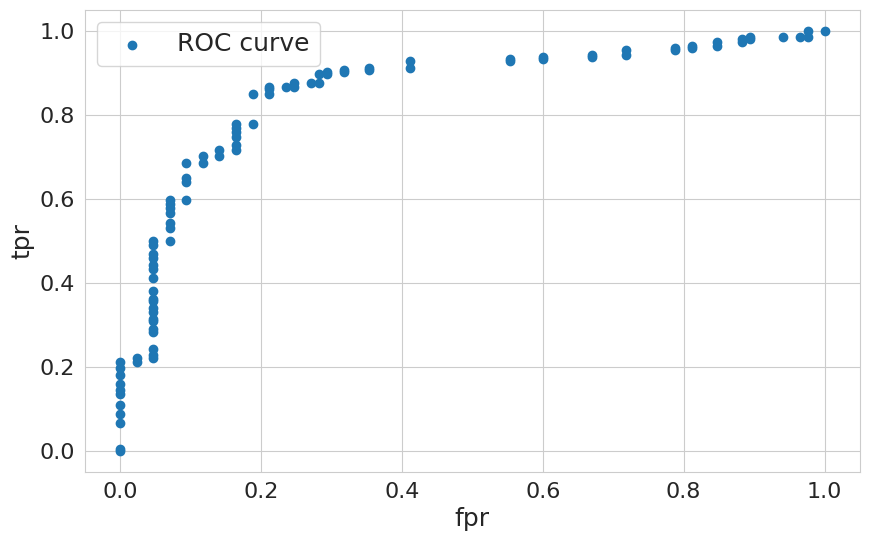

In [23]:
plt.figure(figsize = (10,6))

plt.scatter(fpr, tpr ,label = "ROC curve")

plt.xlabel("fpr", fontsize=18)
plt.ylabel("tpr", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

In [24]:
model_fft = models.Sequential()
model_fft.add(layers.Dense(64, activation='relu', input_shape=(1940,)))
model_fft.add(layers.Dense(64, activation='relu'))
model_fft.add(layers.Dense(32, activation='relu'))
model_fft.add(layers.Dense(2, activation='softmax'))
model_fft.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                124224    
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 130530 (509.88 KB)
Trainable params: 130530 (509.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# we compile the network like so
model_fft.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [26]:
history_fft = model_fft.fit(X_fft_train,
                        to_categorical(y_fft_train),
                        epochs = 150,
                        batch_size = 250,
                        validation_data=(X_fft_test,to_categorical(y_fft_test)))
history_fft_dict = history_fft.history

Epoch 1/150
3/3 [==============================] - 2s 275ms/step - loss: 70.2540 - accuracy: 0.6302 - val_loss: 45.9472 - val_accuracy: 0.6165
Epoch 2/150
3/3 [==============================] - 0s 88ms/step - loss: 32.8836 - accuracy: 0.6179 - val_loss: 19.3967 - val_accuracy: 0.7168
Epoch 3/150
3/3 [==============================] - 0s 152ms/step - loss: 15.7002 - accuracy: 0.7149 - val_loss: 12.5733 - val_accuracy: 0.7527
Epoch 4/150
3/3 [==============================] - 0s 163ms/step - loss: 11.7523 - accuracy: 0.7797 - val_loss: 9.7626 - val_accuracy: 0.7921
Epoch 5/150
3/3 [==============================] - 0s 117ms/step - loss: 7.8201 - accuracy: 0.7935 - val_loss: 7.7424 - val_accuracy: 0.7849
Epoch 6/150
3/3 [==============================] - 0s 179ms/step - loss: 5.1519 - accuracy: 0.8274 - val_loss: 5.4445 - val_accuracy: 0.8136
Epoch 7/150
3/3 [==============================] - 0s 169ms/step - loss: 3.5180 - accuracy: 0.8259 - val_loss: 4.6127 - val_accuracy: 0.8423
Epoch 8

In [27]:
model_fft = models.Sequential()
model_fft.add(layers.Dense(512, activation='relu', input_shape=(1940,)))
model_fft.add(layers.Dense(512, activation='relu'))
model_fft.add(layers.Dense(256, activation='relu'))
model_fft.add(layers.Dense(128, activation='relu'))
model_fft.add(layers.Dense(2, activation='softmax'))
model_fft.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               993792    
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 2)                 258       
                                                                 
Total params: 1420930 (5.42 MB)
Trainable params: 1420930 (5.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# we compile the network like so
model_fft.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [29]:
history_fft = model_fft.fit(X_fft_train,
                        to_categorical(y_fft_train),
                        epochs = 150,
                        batch_size = 200,
                        validation_data=(X_fft_test,to_categorical(y_fft_test)))
history_fft_dict = history_fft.history

Epoch 1/150
4/4 [==============================] - 2s 198ms/step - loss: 383.3001 - accuracy: 0.5701 - val_loss: 81.9004 - val_accuracy: 0.4659
Epoch 2/150
4/4 [==============================] - 0s 89ms/step - loss: 63.5891 - accuracy: 0.6240 - val_loss: 111.3784 - val_accuracy: 0.3656
Epoch 3/150
4/4 [==============================] - 0s 88ms/step - loss: 69.2862 - accuracy: 0.5069 - val_loss: 88.6953 - val_accuracy: 0.6953
Epoch 4/150
4/4 [==============================] - 1s 140ms/step - loss: 53.9327 - accuracy: 0.6872 - val_loss: 23.3523 - val_accuracy: 0.6667
Epoch 5/150
4/4 [==============================] - 1s 145ms/step - loss: 23.7165 - accuracy: 0.7057 - val_loss: 10.1423 - val_accuracy: 0.7634
Epoch 6/150
4/4 [==============================] - 0s 111ms/step - loss: 11.3907 - accuracy: 0.7396 - val_loss: 4.5073 - val_accuracy: 0.8172
Epoch 7/150
4/4 [==============================] - 0s 120ms/step - loss: 5.6087 - accuracy: 0.7781 - val_loss: 3.9871 - val_accuracy: 0.8065
Ep

0.6774193548387096
0.8561643835616438
0.6443298969072165


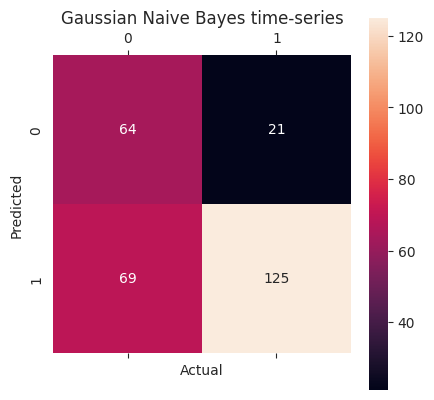

In [30]:
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train);
y_pred_gnb = model_gnb.predict(X_test)
print( accuracy_score(y_test,y_pred_gnb))
print( precision_score(y_test,y_pred_gnb))
print( recall_score(y_test,y_pred_gnb))

confmat = confusion_matrix(y_test,y_pred_gnb)
plt.matshow(confmat)
sn.heatmap(confmat,annot=True, annot_kws={"size":10}, fmt='d')
plt.title("Gaussian Naive Bayes time-series")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.savefig("Long_lead_Gaussian Naive Bayes time-series")

0.6093189964157706
0.897196261682243
0.4948453608247423


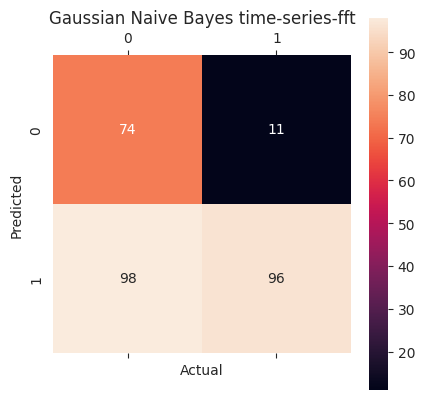

In [31]:
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_fft_train, y_fft_train);
y_fft_pred_gnb = model_gnb.predict(X_fft_test)
print( accuracy_score(y_fft_test,y_fft_pred_gnb))
print( precision_score(y_fft_test,y_fft_pred_gnb))
print( recall_score(y_fft_test,y_fft_pred_gnb))

confmat = confusion_matrix(y_fft_test,y_fft_pred_gnb)
plt.matshow(confmat)
sn.heatmap(confmat,annot=True, annot_kws={"size":10}, fmt='d')
plt.title("Gaussian Naive Bayes time-series-fft")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.savefig("Long_lead_Gaussian Naive Bayes time-series-fft")

0.7670250896057348
0.8909090909090909
0.7577319587628866


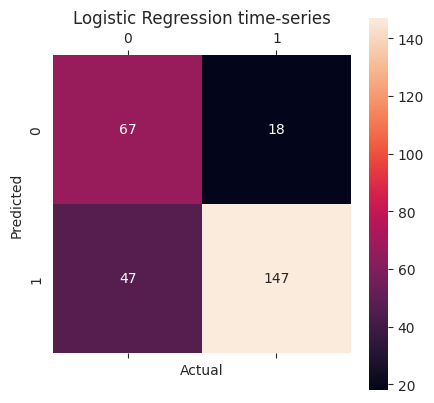

In [32]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=100000)
log_reg.fit(X_train,y_train)
y_pred_log_reg = log_reg.predict(X_test)
print( accuracy_score(y_test,y_pred_log_reg))
print( precision_score(y_test,y_pred_log_reg))
print( recall_score(y_test,y_pred_log_reg))

confmat = confusion_matrix(y_test,y_pred_log_reg)
plt.matshow(confmat)
sn.heatmap(confmat,annot=True, annot_kws={"size":10}, fmt='d')
plt.title("Logistic Regression time-series")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.savefig("Long_lead_Logistic Regression time-series")

0.8853046594982079
0.9550561797752809
0.8762886597938144


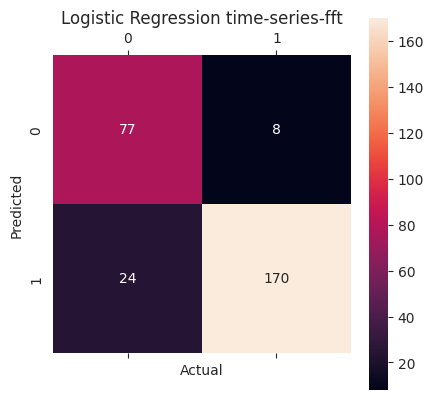

In [33]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=100000)
log_reg.fit(X_fft_train[:,:],y_fft_train)
y_fft_pred_log_reg = log_reg.predict(X_fft_test[:,:])
print( accuracy_score(y_fft_test,y_fft_pred_log_reg))
print( precision_score(y_fft_test,y_fft_pred_log_reg))
print( recall_score(y_fft_test,y_fft_pred_log_reg))

confmat = confusion_matrix(y_fft_test,y_fft_pred_log_reg)
plt.matshow(confmat)
sn.heatmap(confmat,annot=True, annot_kws={"size":10}, fmt='d')
plt.title("Logistic Regression time-series-fft")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.savefig("Long_lead_Logistic Regression time-series-fft")